In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings                        # To ignore any warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_original = train.copy()
test_original = test.copy()

In [7]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


# Univariate Analysis

## Analysizing the target variable 

In [8]:
y = train["Loan_Status"]

In [9]:
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
y.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

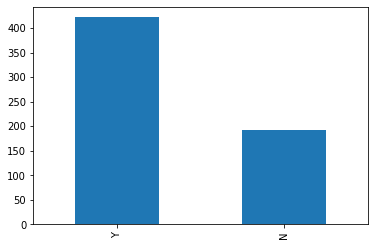

In [11]:
y.value_counts().plot.bar()

## Analyzing categorical features

In [12]:
cat_features = train.select_dtypes(include=object)

In [13]:
cat_features = cat_features.drop(columns=["Loan_ID"])

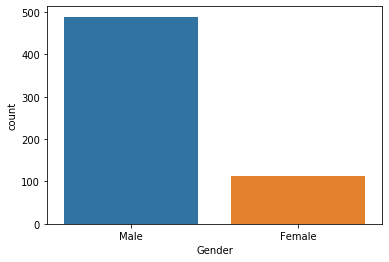

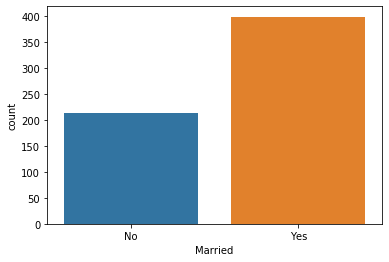

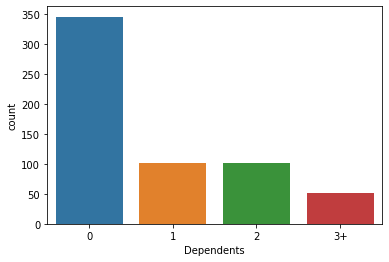

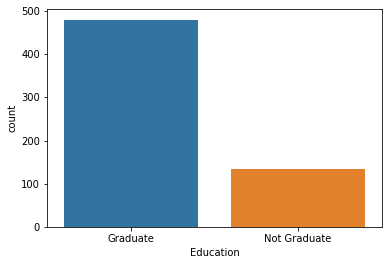

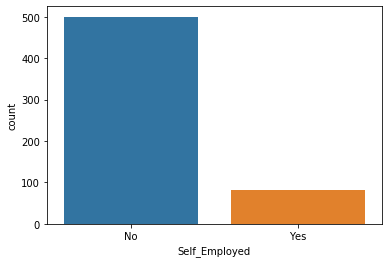

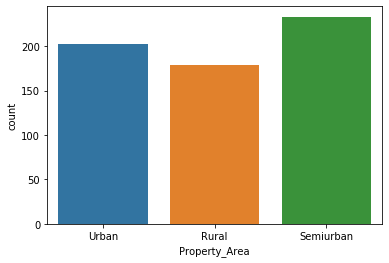

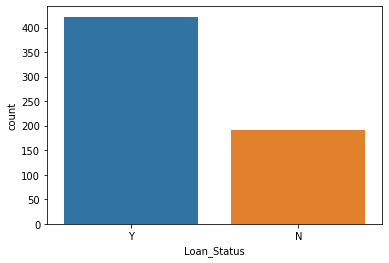

In [14]:
for i in cat_features:
    sns.countplot(x=i,data=cat_features)
    plt.show()

## Exploring Numerical variables

In [15]:
num_features = train.select_dtypes(include=["int64","float64"])

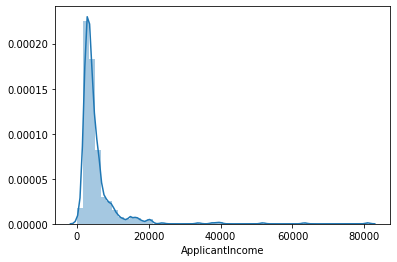

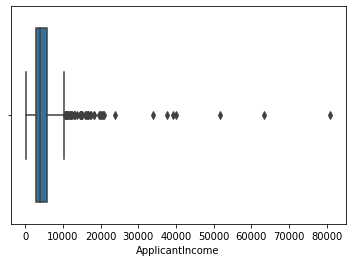

In [16]:
sns.distplot(num_features["ApplicantIncome"])
plt.show()
sns.boxplot(num_features["ApplicantIncome"])
plt.show()

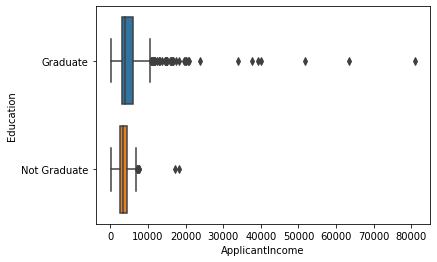

In [17]:
sns.set
sns.boxplot(x="ApplicantIncome",y="Education",data=train)
plt.show()

In [18]:
num_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [19]:
train = train.dropna()

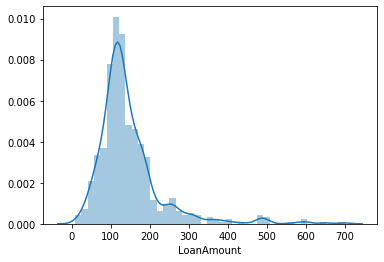

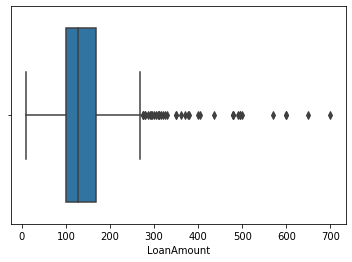

In [20]:
sns.distplot(num_features["LoanAmount"])
plt.show()
sns.boxplot(num_features["LoanAmount"])

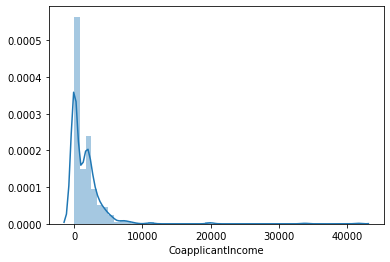

In [21]:
sns.distplot(num_features["CoapplicantIncome"])

# Bivariate Analysis

## Categorical v/s Target Variable

In [22]:
Gender =pd.crosstab(train['Gender'],train['Loan_Status'])

In [23]:
Gender

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


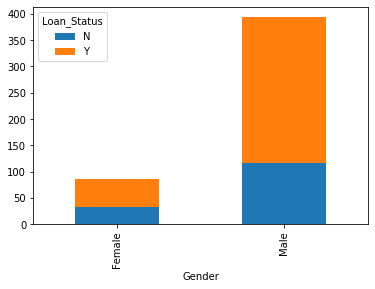

In [24]:
Gender.plot.bar(stacked=True)
plt.show()

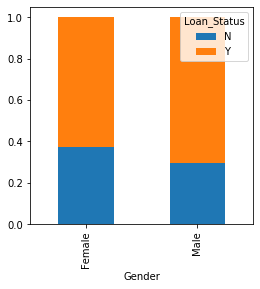

In [25]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [26]:
# Categorial variables v/s Target Variable
list_cat =cat_features.columns
list_cat=list_cat.drop("Loan_Status")
list_cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [27]:
for i in list_cat:
    i = pd.crosstab(cat_features[i],cat_features['Loan_Status'])
    print(i)
    print("---------------------")

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
---------------------
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
---------------------
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
---------------------
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
---------------------
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
---------------------
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
---------------------


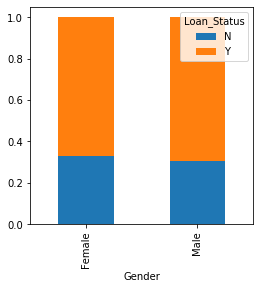

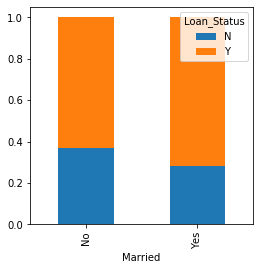

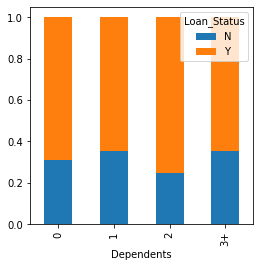

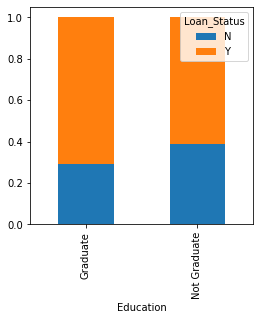

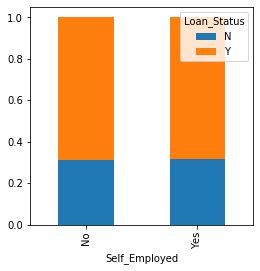

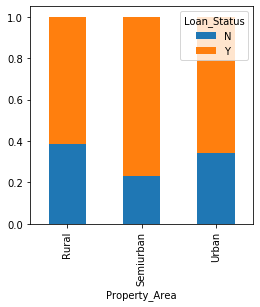

In [28]:
for i in list_cat:
    i = pd.crosstab(cat_features[i],cat_features['Loan_Status'])
    i.div(i.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
    plt.show()

In [29]:
creditHist = pd.crosstab(train["Credit_History"],train["Loan_Status"])
creditHist

Loan_Status,N,Y
Credit_History,,
0.0,63,7
1.0,85,325


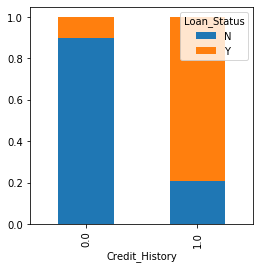

In [30]:
creditHist.div(creditHist.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [31]:
train_original['Dependents'].replace('3+',3,inplace=True)
test_original['Dependents'].replace('3+',3,inplace=True)
train_original['Loan_Status'].replace('Y',1,inplace=True)
train_original['Loan_Status'].replace('N',0,inplace=True)

In [32]:
corr_mat = train_original.corr()

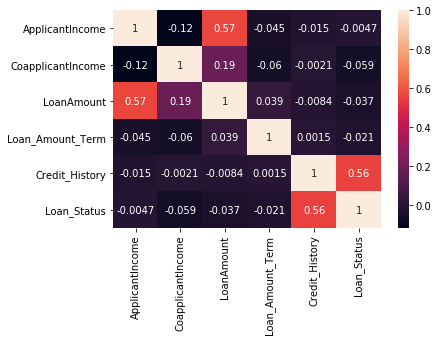

In [33]:
sns.heatmap(corr_mat,annot=True)

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

## Missing Value Imputation

In [34]:
train_original.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can consider these methods to fill the missing values:

    For numerical variables: imputation using mean or median
    For categorical variables: imputation using mode

In [35]:
mis_cat_list = ['Gender','Married','Dependents',
                'Self_Employed','Credit_History','Loan_Amount_Term']

mis_cat_list

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'Credit_History',
 'Loan_Amount_Term']

In [36]:
for i in mis_cat_list:
    train_original[i].fillna(train_original[i].mode()[0],inplace=True)

In [37]:
train_original.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [38]:
train_original['LoanAmount'].fillna(train_original['LoanAmount'].median(), inplace=True)

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
for i in mis_cat_list:
    test_original[i].fillna(test_original[i].mode()[0],inplace=True)

In [41]:
test_original['LoanAmount'].fillna(test_original['LoanAmount'].median(), inplace=True)

In [42]:
test_original.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

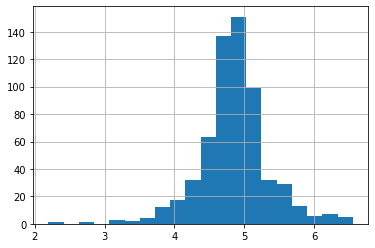

In [43]:
train_original['LoanAmount_log'] = np.log(train_original['LoanAmount']) 
train_original['LoanAmount_log'].hist(bins=20) 
test_original['LoanAmount_log'] = np.log(test_original['LoanAmount'])


# Model Building

In [44]:
train_original = train_original.drop('Loan_ID',axis=1)
test_original = test_original.drop('Loan_ID',axis=1)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [45]:
X=train_original.drop('Loan_Status',axis=1)
y=train_original.Loan_Status

In [46]:
X=pd.get_dummies(X) 
train_original=pd.get_dummies(train_original) 
test_original=pd.get_dummies(test_original)


Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
pred_cv = model.predict(x_cv)

In [50]:
accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [51]:
pred_test_1 = model.predict(test_original)
pred_test_1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

## using StratifiedKFOLD

In [52]:
from sklearn.model_selection import StratifiedKFold

i=1 
kf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test_original) 
    pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy_score 0.8536585365853658

2 of kfold 5
accuracy_score 0.7398373983739838

3 of kfold 5
accuracy_score 0.8211382113821138

4 of kfold 5
accuracy_score 0.7560975609756098

5 of kfold 5
accuracy_score 0.7868852459016393


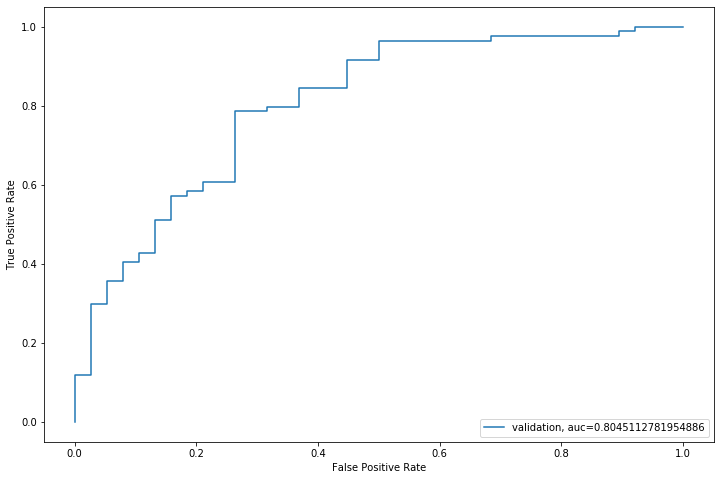

In [53]:
#Visualiazing ROC curve
from sklearn import metrics 
fpr, tpr ,_ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()


In [54]:
# submission['Loan_Status']=pred_test
# submission['Loan_ID']=test_original['Loan_ID']
# pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

# Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

    ->Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
    -> EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount 
    with respect to loan amount term.
    ->Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [55]:
train_original['Total_Income']=train_original["ApplicantIncome"]+train_original['CoapplicantIncome']
test_original['Total_Income']=test_original['ApplicantIncome']+test_original['CoapplicantIncome']

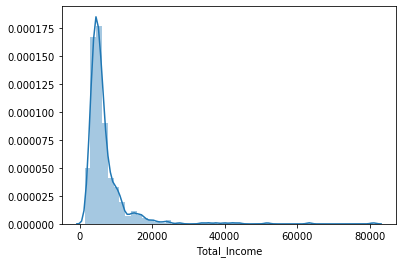

In [56]:
sns.distplot(train_original["Total_Income"])
plt.show()

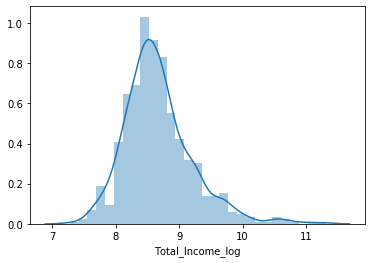

In [57]:
#Highly right skewed so we do a log transformation

train_original['Total_Income_log'] = np.log(train_original['Total_Income']) 
sns.distplot(train_original['Total_Income_log']); 
test_original['Total_Income_log'] = np.log(test_original['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

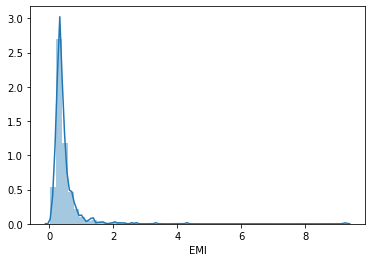

In [67]:
train_original['EMI']=train_original['LoanAmount']/train_original['Loan_Amount_Term'] 
test_original['EMI']=test_original['LoanAmount']/test_original['Loan_Amount_Term']

sns.distplot(train_original['EMI'])
# train_original['EMI'].isnull().sum()

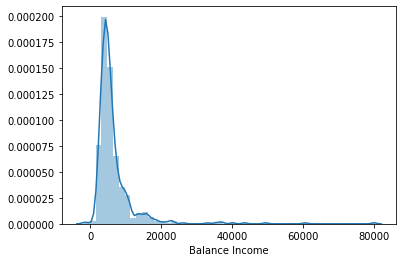

In [68]:
train_original['Balance Income']=train_original['Total_Income']-(train_original['EMI']*1000) # Multiply with 1000 to make the units equal 
test_original['Balance Income']=test_original['Total_Income']-(test_original['EMI']*1000)
sns.distplot(train_original['Balance Income'])

In [71]:
train_original['Balance Income'].isnull().sum()

0

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [60]:
# train_original=train_original.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
# test_original=test_original.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Builidng Multiple models

We will build the following models in this section.

    Logistic Regression
    Decision Tree
    Random Forest
    XGBoost

### Desicion Tree

In [72]:
X = train_original.drop('Loan_Status',1) 
y = train_original.Loan_Status

In [73]:
X['EMI'].isnull().sum()

0

In [74]:
from sklearn import tree
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test_2 = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test_2)     
    print('accuracy_score',score)     
    i+=1 



1 of kfold 5
accuracy_score 0.6991869918699187

2 of kfold 5
accuracy_score 0.7479674796747967

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.6910569105691057

5 of kfold 5
accuracy_score 0.6885245901639344


In [75]:
pred_test_2 = model.predict(test_original)

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test_3 = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test_3)     
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.8211382113821138

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393


In [78]:
pred_test_3 = model.predict(test_original)

### Using GridCV

In [79]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [80]:
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [81]:
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [82]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.

In [84]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=3, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test_4 = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test_4)     
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393


In [85]:
pred_test_4 = model.predict(test_original) 
pred2=model.predict_proba(test_original)[:,1]

## Finding Feature Importance

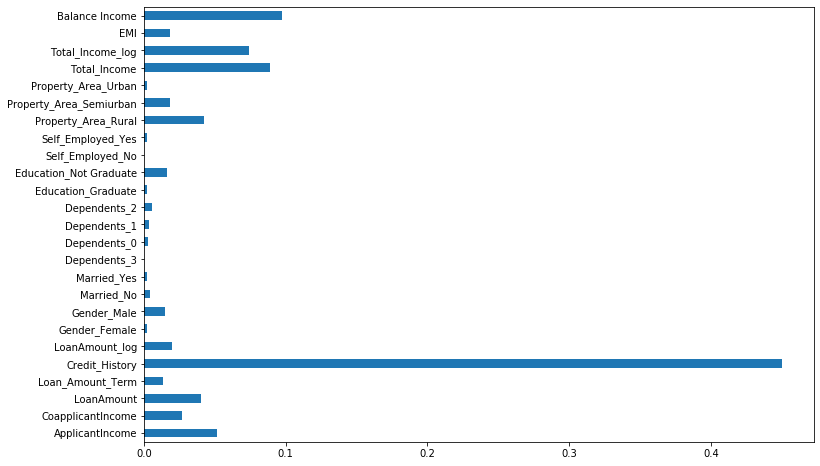

In [86]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

### XGBoost

In [88]:
from xgboost import XGBClassifier

In [90]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test_5 = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test_5)     
    print('accuracy_score',score)     
    i+=1


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7950819672131147


In [92]:
pred_test_5 = model.predict(test_original) 
pred3=model.predict_proba(test_original)[:,1]